## 4. Increasing the Vibrance of a Photograph by Intensity Transformation

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

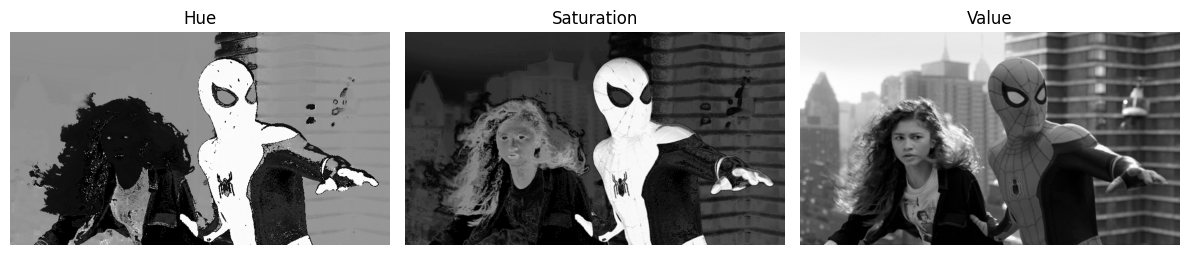

In [3]:
spider_bgr = cv.imread('a1images/spider.png')
assert spider_bgr is not None
spider_hsv = cv.cvtColor(spider_bgr, cv.COLOR_BGR2HSV)
spider_rgb = cv.cvtColor(spider_bgr, cv.COLOR_BGR2RGB)

# Split into planes
Hue, Saturation, Value = cv.split(spider_hsv)
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(Hue,cmap='gray')
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(Saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(Value, cmap='gray')
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

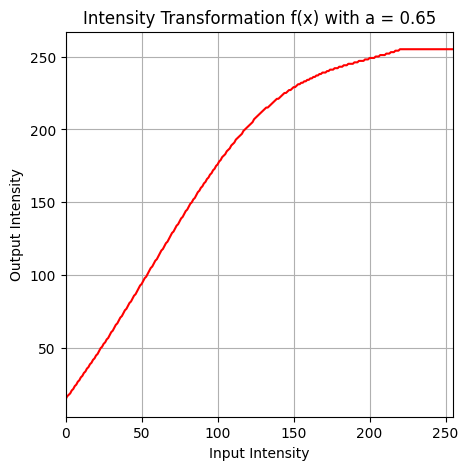

In [4]:
# Create vibrance transformation
a = 0.65
sigma = 70.0 
x = np.arange(0, 256)
f = np.minimum(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255).astype('uint8')

# Plot transformation curve
plt.figure(figsize=(5, 5))
plt.plot(x, f, color='red')
plt.title(f'Intensity Transformation f(x) with a = {a}')
plt.xlabel('Input Intensity' )
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim([0, 255])
plt.xlim([0, 255])
plt.show()

In [ ]:
# Apply transformation to Saturation plane
S_modified = cv.LUT(Saturation, f)

# Merge modified S back and convert to RGB
merged = cv.merge([Hue, S_modified, Value])
spider_vibrance_rgb = cv.cvtColor(merged, cv.COLOR_HSV2RGB)


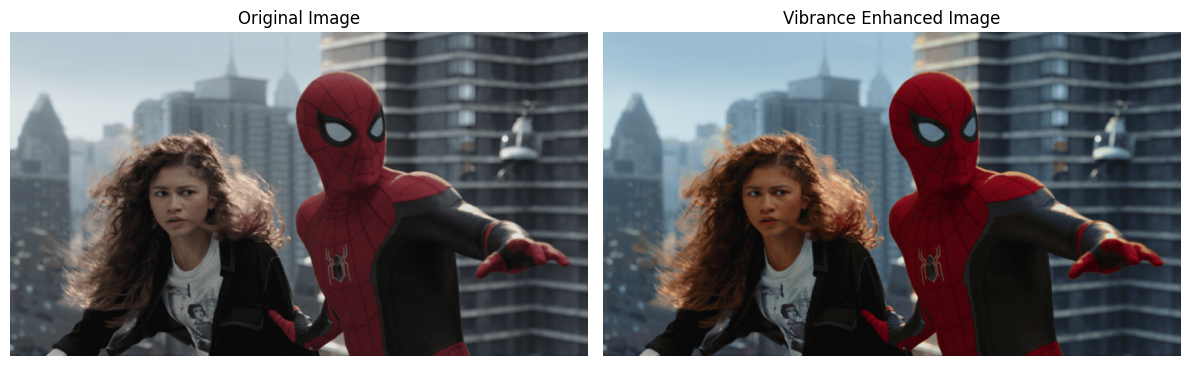

In [6]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the Original Image
axs[0].imshow(spider_rgb)
axs[0].set_title('Original Image')
axs[0].axis('off') 

# Plot the Vibrance Enhanced Image
axs[1].imshow(spider_vibrance_rgb)
axs[1].set_title('Vibrance Enhanced Image')
axs[1].axis('off')  

# Show the plot
plt.tight_layout()
plt.show()

# Approch

The image was split into Hue, Saturation, and Value channels, and an intensity transformation was applied to the Saturation channel using the given formula with 𝜎 = 70. The parameter 𝑎  was tuned to achieve a visually pleasing vibrance enhancement before recombining the channels to form the final image.



# Interpretation

##### The best value for 'a' seems to be in the range of 0.5 to 0.7 to get a visually pleasing output.


Adjusting 𝑎 a increased color intensity in mid-saturation ranges, making the image appear more vibrant without oversaturating extreme values. The enhancement preserved natural color transitions while emphasizing colors that were previously muted.